In [1]:
## we are trying to predict the house price, with such features, it is going to be a process mostly include EDA(visulizaiont) 
##and feature enginning and model selection

### -dataset ,train,test for training and validate the model
### - target to predicting,SalePrice

## base assumptions,
1 all the money terms are converted as the same time

## 



Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# 1 recruite our team

In [231]:
## general
import os
import re
from copy import deepcopy
## data cleaning and manipulation
import numpy as np
import pandas as pd
## visulization
import matplotlib.pyplot as plt
import seaborn as sns

## eda--team member to perform data exploartion analysis
from scipy import stats
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import iqr

## data preprocessing-in case of data normalization
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
## matrix- evaluation matrix for comparing models
from sklearn.metrics import  mean_squared_error

## feature engineering with h2o
import h2o
h2o.init()
from h2o.estimators import H2OTargetEncoderEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

## model buliding- package for bulid all kinds of model
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.base import BaseEstimator
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


## pipeline - to integrate the data transformation, feature selection, as well as modeling buliding 
from sklearn.pipeline import Pipeline

## matrix for scoring model
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error



## settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

DATA_DIR='./'

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_321"; Java(TM) SE Runtime Environment (build 1.8.0_321-b07); Java HotSpot(TM) 64-Bit Server VM (build 25.321-b07, mixed mode)
  Starting server from /Users/root1/anaconda3/envs/sklearn_2022/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/qp/62byk9gs7738gg2bzjf8p3br0000gn/T/tmpdvheg4je
  JVM stdout: /var/folders/qp/62byk9gs7738gg2bzjf8p3br0000gn/T/tmpdvheg4je/h2o_root1_started_from_python.out
  JVM stderr: /var/folders/qp/62byk9gs7738gg2bzjf8p3br0000gn/T/tmpdvheg4je/h2o_root1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_root1_dtlvfp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


## 2 Invite the data

In [5]:
train = pd.read_csv(os.path.join(DATA_DIR,'train.csv'),index_col='Id')
test = pd.read_csv(os.path.join(DATA_DIR,'test.csv'),index_col='Id')

## 2.1Data description

In [6]:
## peak at the data to get  a summary of data,for example. how many columns and rows, missing data,data abnoraml
train.shape

(1460, 80)

In [7]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
print(f'sample data has columns of  {len(train.columns)} variables')
print(f'sample data has among of {len(train)} observations')
print(f'sample data has data types of {train.dtypes.unique()}')

sample data has columns of  80 variables
sample data has among of 1460 observations
sample data has data types of [dtype('int64') dtype('O') dtype('float64')]


## 2.2 missing data

In [9]:
## some of data is missing, in percentage
missing_counts = train.isnull().sum(axis=0)
missing_df = pd.DataFrame(missing_counts,columns=['missing_counts'])
missing_df['percent'] = missing_df['missing_counts'].apply(lambda x:x/len(train)*100)
missing_df = missing_df[missing_df['percent']>0].sort_values(by='percent',ascending=True)

In [10]:
missing_df.sort_values(by='percent',ascending=False) ## there are 19 columns has missing values

,missing_counts,percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageFinish,81,5.547945
GarageYrBlt,81,5.547945
GarageType,81,5.547945
GarageQual,81,5.547945


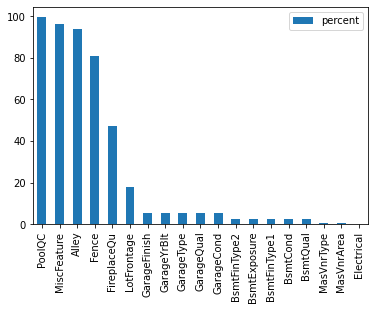

In [11]:
# fig,ax = plt.subplots(121,figsize=(15,6),)
missing_df.sort_values(by='percent',ascending=False).plot(kind='bar',y='percent');

In [12]:
##drop the column has more than 10% missing points
missing_than_10 = missing_df[missing_df['percent']>10].index.tolist()
train_drop_miss = train.drop(missing_than_10,axis=1)

In [13]:
## before impution we shall drop the outlier points

In [14]:
## drop missing columns:
def drop_missing(df,criterior):
    '''drop some columns has missing values than the criterior
    Args:
        df - pandas.Dataframe 
        criterior - float - percent of missing 
    Returns:
        df - pandas.DataFrame
    
    '''
    missing_counts = df.isnull().sum(axis=0)
    missing_df = pd.DataFrame(missing_counts,columns=['missing_counts'])
    missing_df['percent'] = missing_df['missing_counts'].apply(lambda x:x/len(df)*100)
    missing_df = missing_df[missing_df['percent']>0].sort_values(by='percent',ascending=True)
    
    missing_than_10 = missing_df[missing_df['percent']>criterior].index.tolist()
    drop_miss = df.drop(missing_than_10,axis=1)
    
    return drop_miss
    
    

In [15]:
missing_than_10

['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']

In [16]:
train_drop_miss = drop_missing(train,10)

## 2.3 Outlier detection

In [17]:
train_outlier = deepcopy(train_drop_miss)


In [18]:
def get_percentile(df, percentile_rank,col_name):
    '''retrun the certain data point
    Args:
        df - pandas DataFrame - input dataframe
        percentil_rank - float -  certain number of percent- such as 25,75 and so on
        col_name - str - which column taking the percentia
    
    '''
    # First, sort by ascending temperature, reset the indices
    df = df.sort_values(by=col_name).reset_index()
    
    # Rule of three to get the index of the temperature
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    # Return the temperature corresponding to the percentile rank
    return df.at[index, col_name]

In [19]:
def get_normal_with_iqr(df,col_name):
    '''return the outlier mask
    Args:
        df - pandas.DataFrame - input dataframe
        col_name - str - the column used for outlier detection
        
    Returns:
        df - pandas.dataframe - Dataframe removed outliers
    
    '''
    ## get the 25 and 75 percentile point
    iqr_25 = get_percentile(df, 25,col_name)
    iqr_75 = get_percentile(df, 75,col_name)
    ##compute the iqr
    irq = iqr_75-iqr_25
    ## get the lower outelier and high outlier
    low_out_lier = iqr_25 - irq
    high_out_lier = iqr_75 + irq
    ## generate the mask
    outlier_mask = (df[col_name]<low_out_lier) | (df[col_name]>high_out_lier)
    ##subset the dataframe
    normal_df = df[~outlier_mask]
    
    return normal_df
    

In [20]:
#generate a new columns as price/area,price is excluded the mis values
train_outlier['price per area'] = (train_outlier['SalePrice']- train_outlier['MiscVal'])/ train_outlier['GrLivArea']

In [21]:
normal_df = get_normal_with_iqr(train_outlier,'price per area')

In [22]:
## drop those two linearly correlated such as price and grlivarea
normal_df.drop(['SalePrice','GrLivArea','MiscVal'],axis=1,inplace=True)

In [23]:
# normal_df.drop(['price per area'],axis=1,inplace=True)

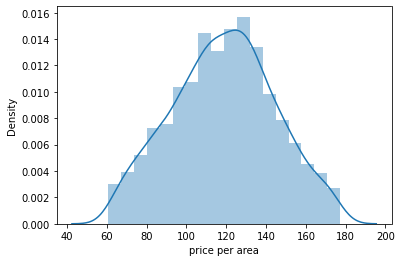

In [24]:
## outlier detection,selection abnormal target variables via 

sns.distplot(normal_df['price per area']);

In [25]:
print(f"the skweness of target data is {normal_df['price per area'].skew()}")


the skweness of target data is -0.022252982401377918


***conclusion***
- there are 19 columns has different magnitude of missing data,which has been dropped out
- there 1460 rows of data and 61 columns and 1target col to predict
- after removing the outlier, left with 1368 of rows



In [26]:
## impute the missing value for numerical and categorical


In [27]:
df_impute  = deepcopy(normal_df)

In [28]:
def impute_missing(*args):
    ''' impute the missing value
    Args:
        df - DataFrame - ready to impute dataframe
        include - str - include or exclude
        data_type - str - such as 'object' or 'float'
        strategy - str - strategy for imputing the value
        
    Returns:
        impute_df - DataFrame - return dataframe with imputed value
        
    
    '''
    df,include_or_not,data_type,strategy = args
    ## select certain dataframe
    if include_or_not=='include':
        df_dtype = df.select_dtypes(include=data_type)
    else:
        df_dtype = df.select_dtypes(exclude=data_type)
#     impute_cols = df_dtype.columns
    
    imp_freq = SimpleImputer(missing_values=np.nan, strategy=strategy)
    df_type_transform = imp_freq.fit_transform(df_dtype)
    
    df_type_transform = pd.DataFrame(df_type_transform)
    df_type_transform.columns = df_dtype.columns
    return df_type_transform
    

In [29]:
df_impute_cate = impute_missing(df_impute,'include','object','most_frequent')

In [30]:
df_impute_numerical = impute_missing(df_impute,'exclude','object','median')

In [31]:
df_impute_numerical.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,price per area
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2.0,2008.0,121.929825
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,143.819334
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,9.0,2008.0,125.139978
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,2.0,2006.0,81.537566
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,12.0,2008.0,113.739763


In [32]:
imputed_df = pd.concat([df_impute_cate,df_impute_numerical],axis=1)

In [33]:
imputed_df.isnull().sum()[imputed_df.isnull().sum()>0] ## empty of missing series

Series([], dtype: int64)

In [34]:
imputed_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF

# 3  EDA

In [35]:
## correlation of indepent variable with target variable

In [36]:
df_eda = deepcopy(imputed_df)

In [37]:
##generate new feature of time duration such as how long the house has been bulit before sold
def gen_time_duration(df,new_column,time_couples):
    '''generate time duration for couple columns
    Args:
        df -  pandas.DataFrame 
        new_column - str -  name for new generating time column
        time_couples - tuple - couples for generating the time span column
    
    Returns:
        time_duration - pd.Series 
    '''
    end_time,start_time = time_couples[0],time_couples[1]
    df[new_column] = df[end_time] - df[start_time]
    
    return df
        
        
        

In [38]:
df_eda = gen_time_duration(df_eda,'house_history',('YrSold','YearRemodAdd'))
df_eda = gen_time_duration(df_eda,'garage_years',('YrSold','GarageYrBlt'))
# df_eda = gen_time_duration(df_eda,'house_history_since_built',('YrSold','YearBuilt'))

In [39]:
df_eda.drop(['YrSold','YearRemodAdd','YearBuilt','GarageYrBlt'],axis=1,inplace=True)

In [40]:
##such columns are hightly correlated, such as garagearea with garagecars,
## house's life and its quality plays an import role for determining the price



In [41]:
##EDA about categorical data
df_eda.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
## exlcude such data might not relate to the target variable for simplying the model
exclude_cols = ['SaleType','SaleCondition','MoSold','MSSubClass','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
sele_cols = [col for col in df_eda.columns if col not in exclude_cols]
df_eda = df_eda[sele_cols]


## preprocressing 


In [43]:
## the data before modeling for categorical data and numerical data

In [44]:
## combined all the process to get the dataframe processed
def preprocessed(df,exclude_cols,outlier_drop=False,criterior=10):
    '''preprocessed the dataframe 
    Args:
        df - pandas.DataFrame
        exclude_cols - list - list for containing the excluded columns
        outer_lier_dorp = bool - whether to drop the outlier
        criterior - threshold for dropping the missing value columns
    Returns:
        processed_df - pandas.DataFrame
    '''
    ## exclude some columns
    sel_cols = [col for col in df.columns if col not in exclude_cols]
    df_drop_cols = df[sel_cols]
    ## drop the missing values
    df_impute = drop_missing(df_drop_cols,criterior)
    ##drop the outlier if outlier drop is Ture
    if outlier_drop:
        ##generate a new columns as price/area,price is excluded the mis values
        df_impute['price per area'] = (df_impute['SalePrice']- df_impute['MiscVal'])/ df_impute['GrLivArea']
        normal_df = get_normal_with_iqr(df_impute,'price per area')
        ## drop those two linearly correlated such as price and grlivarea
#         normal_df.drop(['SalePrice','GrLivArea','MiscVal'],axis=1,inplace=True)
#         normal_df.drop(['price per area'],axis=1,inplace=True)
        df_impute = deepcopy(normal_df)
    else:
#         df_impute.drop(['GrLivArea','MiscVal'],axis=1,inplace=True)
        pass
    ##impute the missing value
    df_impute_cate = impute_missing(df_impute,'include','object','most_frequent')
    df_impute_numerical = impute_missing(df_impute,'exclude','object','median')
    imputed_df = pd.concat([df_impute_cate,df_impute_numerical],axis=1)
    ## generate the time span
    df_eda = gen_time_duration(imputed_df,'house_history',('YrSold','YearRemodAdd'))
    df_eda = gen_time_duration(df_eda,'garage_years',('YrSold','GarageYrBlt'))
    ## drop the time using for computing
    df_eda.drop(['YrSold','YearRemodAdd','YearBuilt','GarageYrBlt'],axis=1,inplace=True)
    
    
    return df_eda
    
    
    
    
    

In [45]:
df_preprocessed = preprocessed(train,exclude_cols,True)

In [46]:
df_preprocessed.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,price per area,house_history,garage_years
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,61.0,0.0,0.0,0.0,0.0,0.0,208500.0,121.929825,5.0,5.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0.0,0.0,0.0,0.0,0.0,0.0,181500.0,143.819334,31.0,31.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,42.0,0.0,0.0,0.0,0.0,0.0,223500.0,125.139978,6.0,7.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,35.0,272.0,0.0,0.0,0.0,0.0,140000.0,81.537566,36.0,8.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,84.0,0.0,0.0,0.0,0.0,0.0,250000.0,113.739763,8.0,8.0


In [47]:
df_preprocessed_test = preprocessed(test,exclude_cols)

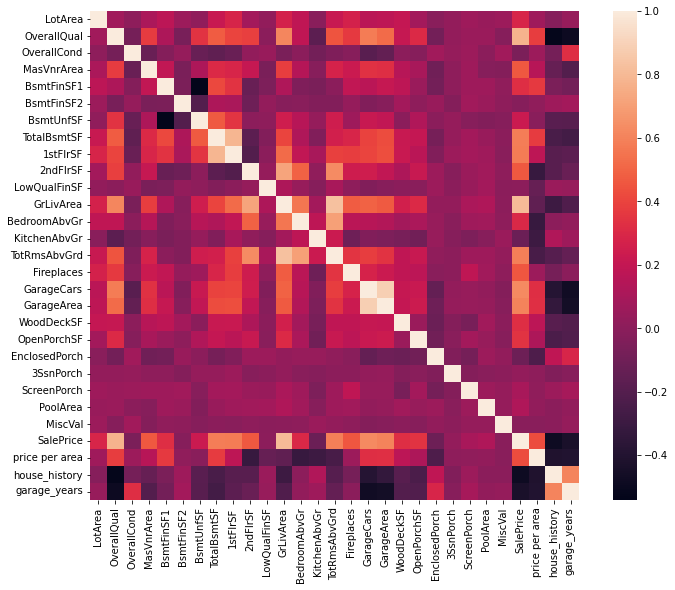

In [48]:

#correlation matrix
corrmat = df_preprocessed.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True);

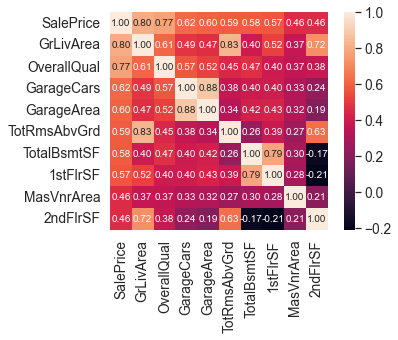

In [49]:
k = 10 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_preprocessed[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Feature Engineering

In [298]:
df_feature = deepcopy(df_preprocessed)
df_feature_test = deepcopy(df_preprocessed_test)

In [262]:
## set such column as categorial data type
# df_feature['OverallQual'] = df_feature['OverallQual'].astype('str')
# df_feature['OverallCond'] = df_feature['OverallCond'].astype('str')

# df_feature_test['OverallQual'] = df_feature_test['OverallQual'].astype('str')
# df_feature_test['OverallCond'] = df_feature_test['OverallCond'].astype('str')

In [300]:
## encoding with h2o for categorical columns

def target_encoding(df_train,df_test,response='SalePrice'):
    '''
    perform target encoding for the categorical columns
    Args:
        df - pandas.DataFrame
    Return:
        frame - h2o.dataframe
        
    
    '''
    seed=1234
    # Choose which columns to encode
    encoded_columns = [col for col in df_train.select_dtypes(include='object').columns]
    #coverting to h2o dataframe
    df_train = h2o.H2OFrame(df_train)
    df_test = h2o.H2OFrame(df_test)
#     titanic['survived'] = titanic['survived'].asfactor()
#     response='survived'
    # For k_fold strategy we need to provide fold column
    fold_column = "kfold_column"
    df_train[fold_column] = df_train.kfold_column(n_folds=5, seed=seed)

    # Train a TE model

    house_te = H2OTargetEncoderEstimator(
                                            fold_column=fold_column,
                                           data_leakage_handling="k_fold",
                                           blending=True,
                                           inflection_point=3,
                                           smoothing=10,
                                           noise=0.15,
                                           seed=seed)

    house_te.train(x=encoded_columns,
                     y=response,
                     training_frame=df_train)

    # New target encoded train and test sets
    train_te = house_te.transform(frame=df_train, as_training=True)
    test_te = house_te.transform(frame=df_test, noise=0)
    
    ##conver to dataframe
    train = train_te.as_data_frame()
    test = test_te.as_data_frame()
#     house = house_te.as_data_frame()
    
    return train,test,house_te,encoded_columns

In [361]:
train_te,test_te,house_te,encoded_cols = target_encoding(df_feature,df_feature_test,response='price per area')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%


In [362]:
def drop_overlap_cols(df):
    '''drop overlap columns for dataframe
    Args:
        df - pandas.DataFrame - input dataframe
    Returns:
        cleaned_df - pandas.DataFrame
    
    '''
    overlaps = []
    ## get name of overlapped column names
    for col in df.columns:
        if re.search(r'_te',col):
            overlaps.append(col[:-3])
    ## remove such columns
    cleaned_df = df[[col for col in df.columns if col not in overlaps]]
    
    return cleaned_df

In [363]:
train_encoded = drop_overlap_cols(train_te)
test_encoded = drop_overlap_cols(test_te)

In [ ]:
## feature engineering for the 

In [364]:
## feature selection with decision tree regerssor
def get_important_features(clf,df,target_col,exclude_cols=['SalePrice','price per area']):
    '''get important feature with tree model
    Args:
        clf - sklearn classifier 
        df - input dataframe
        target_col - str - name of target column
        exclude_cols - list - columns to exclude
    
    '''
    features = []
    # get feature importan for all the features
#     clf = DecisionTreeRegressor(random_state=0)
    select_cols = [col for col in df.columns if col not in  exclude_cols]
    clf.fit(df[select_cols],df[target_col])
    # get the features wich is important than the median value
    median_score = np.median(clf.feature_importances_)
    for feature,score in zip(clf.feature_names_in_,clf.feature_importances_):
        if score>median_score:
    #         print(feature,score)
            features.append(feature)
    return features
    
    

In [365]:
important_features = get_important_features(DecisionTreeRegressor(random_state=0),train_encoded,'price per area')

In [423]:
##feature engineering after feature selection
num_features = [col for col in important_features if not re.search(r'_te',col)]
def gen_features(df,important_features):
    '''generate some features
    Args:
        df - pandas.DataFrame
        important_features -list - features selected by decision tree regressor
    Returns:
        compond_df - pandas.DataFrame
        
    '''
    df = df[important_features]
    #feature generation
    cols_computed = ['LotArea','TotalBsmtSF','GarageArea','1stFlrSF','2ndFlrSF','LowQualFinSF','EnclosedPorch']
    df['grliver_to_lot'] = df['GrLivArea']/df['LotArea']
    df['bsment_to_live'] = df['TotalBsmtSF'] / df['GrLivArea']
    df['garage_to_live'] = df['GarageArea'] / df['GrLivArea']
    df['first_to_live'] = df['1stFlrSF']/ df['GrLivArea']
    df['second_to_live']= df['2ndFlrSF']/df['GrLivArea']
    df['lower_to_live'] = df['LowQualFinSF']/df['GrLivArea']
    
    select_cols = [col for col in df.columns if col not in cols_computed]
    
    return df[select_cols]
    

In [424]:
gen_features(train_encoded,important_features)

,LotShape_te,LotConfig_te,Neighborhood_te,Condition1_te,BldgType_te,HouseStyle_te,Exterior1st_te,MasVnrType_te,ExterQual_te,Foundation_te,...,TotRmsAbvGrd,EnclosedPorch,house_history,garage_years,grliver_to_lot,bsment_to_live,garage_to_live,first_to_live,second_to_live,lower_to_live
0,114.918700,117.642834,135.175094,120.830214,119.781810,111.375097,129.193771,123.275308,130.325280,129.409962,...,8,0,5,5.0,0.202367,0.500585,0.320468,0.500585,0.499415,0.0
1,115.408421,119.619827,122.597631,100.365297,118.951041,128.376597,109.113819,114.128961,111.219932,114.206160,...,6,0,31,31.0,0.131458,1.000000,0.364501,1.000000,0.000000,0.0
2,122.464083,117.723952,136.477969,120.857905,119.059135,110.595934,129.477153,122.320920,130.642456,128.931579,...,6,0,6,7.0,0.158756,0.515118,0.340426,0.515118,0.484882,0.0
3,125.283796,117.433534,120.375160,120.303952,119.135121,111.646907,108.742929,114.387071,111.484996,96.070072,...,7,272,36,8.0,0.179791,0.440303,0.373908,0.559697,0.440303,0.0
4,124.415632,121.387828,132.503730,120.751741,119.301569,111.441500,129.641810,122.555916,131.000050,128.585642,...,9,0,8,8.0,0.154137,0.520928,0.380346,0.520928,0.479072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,115.590091,117.797528,118.664233,120.931481,119.132712,110.669511,129.550729,114.310632,111.401602,129.005155,...,7,0,7,8.0,0.208033,0.578628,0.279296,0.578628,0.421372,0.0
1364,115.268234,118.071375,112.672232,120.960700,119.510528,127.472551,116.871332,137.360153,112.264706,115.430464,...,7,0,22,32.0,0.157343,0.743849,0.241196,1.000000,0.000000,0.0
1365,114.260567,117.260554,120.083629,120.012421,118.843590,111.355376,119.443607,114.095540,146.267489,122.511799,...,9,0,4,69.0,0.258792,0.492308,0.107692,0.507692,0.492308,0.0
1366,116.099984,119.108687,117.020118,121.495066,120.132388,128.955558,108.992737,115.393346,112.357790,115.129762,...,5,112,14,60.0,0.110940,1.000000,0.222635,1.000000,0.000000,0.0


In [223]:
def stand_encoding(df,target_col=['SalePrice','price per area'],scaler=MinMaxScaler()):
    '''return the encoding columns for categorical data and numberical data
    Args:
        df - DataFrame - input DataFrame
    Returns:
        df_scaled - pandas.DataFrame - scaled dataframe
    
    '''
    #categorical data
    df_pro = df[ [col for col in df.columns  if col not in target_col]]
    df_cate = df_pro.select_dtypes(include='object')
    df_num = df_pro.select_dtypes(exclude='object')
    
    df_cate_dummies = pd.get_dummies(df_cate,drop_first=True)
    df_num_scaled = scaler.fit_transform(df_num)
    df_num_scaled = pd.DataFrame(df_num_scaled,columns=df_num.columns)
    
    df_scaled = pd.concat([df_num_scaled,df_cate_dummies],axis=1)
    
    return df_scaled

In [224]:
df_scaled =stand_encoding(df_preprocessed,)

In [229]:
def forward_selection(original_df,scaled_df,target_cols,estimator=GradientBoostingRegressor()):
    '''choosing the important numberical features
    Args:
        original_df - pandas.DataFrame - original dataframe for getting the t
        scaled_df - panda.DataFrame - dataframe covert all data to numerical type
        target_cols - list - to get the target series
        
    Returns:
        feature_cols - list - feature of columns with forward selection
    '''
#     estimator  = Lasso()
    features = []
#     num_sample = df.select_dtypes(exclude='object')
    x_sample = scaled_df
#     print(num_x.columns)
#     scaler = MinMaxScaler()
#     num_x = scaler.fit_transform(num_sample)
    y_sample = original_df[target_cols]
#     feature_selection = SelectFromModel(estimator)
#     feature_selection.fit(x_sample, num_y)

#     selected_features = feature_selection.transform(x_sample)
#     features = x_sample.columns[feature_selection.get_support()]
    # Build RF classifier to use in feature selection
#     clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

    # Build step forward feature selection
    sfs1 = sfs(estimator,
               k_features=20,
               forward=True,
               floating=False,
               verbose=2,
#                n_jobs=4,
               scoring='r2',
#                skip_if_stuck=True,
#                print_progress=False,
               cv=2)

    # Perform SFFS
    sfs1 = sfs1.fit(x_sample, y_sample)
    scores = sfs1.k_score_
    
    # which feature
#     feat_cols = sfs1.k_features
    feat_cols_index = list(sfs1.k_feature_idx_)
    features_name = sfs1.k_feature_names_
#     print(feat_cols)
#     for feat_col_index in feat_cols_index:
#         features.append(x_sample.columns[feat_col_index])
    
    return features_name,scores
    

In [230]:
features = forward_selection(df_preprocessed,df_scaled,['SalePrice'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:    7.9s finished

[2022-02-07 13:29:56] Features: 1/20 -- score: 0.6597465707059128[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:    9.4s finished

[2022-02-07 13:30:06] Features: 2/20 -- score: 0.8170021905742422[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   16.4s finished

[2022-02-07 13:30:22] Features: 3/20 -- score: 0.8550378562073587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [221]:
features

(('GrLivArea',
  'WoodDeckSF',
  'SalePrice',
  'LotShape',
  'Utilities',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'Electrical',
  'Functional'),
 0.9991133311503597)

In [65]:
def get_original_feature(features,exclude='house_history'):
    '''get feature from one hot encoding features
    Args:
        features  - list - list of all the features
    Returns:
        ori_features - list - original feature names
    
    '''
    ori_features = set()
    for feature in features:
        if re.search('_',feature) and  feature != exclude:
            ori_features.add(feature.split('_')[0])
        elif  (re.search('_',feature) and feature == exclude) or  (not re.search('_',feature)) :
            ori_features.add(feature)
            
    return ori_features
            
    

In [66]:
ori_features = get_original_feature(features[0],exclude='house_history')

## bulid pipeline

In [159]:

class RgrSwitcher(BaseEstimator):
    '''code source
    https://stackoverflow.com/questions/50285973/pipeline-multiple-classifiers
    '''
    def __init__(
        self, 
        estimator = LinearRegression(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator
        
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


#     def predict_proba(self, X):
#         return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [68]:
## feature

In [184]:
def bulid_pipeline(df,feature_cols):
    '''bulid data pipeline for ready-training
    Args:
        df - dataframe 
    Returns:
        pipeline - sk-learn pipeline
    
    '''
    #exclude target column
    df = df[feature_cols]
    nominal = df.select_dtypes(include='object').columns
    numerical= df.select_dtypes(exclude='object').columns
#     pca = PCA()
    #initialize the pipeline
    print(nominal)
    nominal_pipeline = Pipeline([
        ("encoder", OneHotEncoder(sparse=False,handle_unknown='ignore'))
    ])
    numerical_pipeline = Pipeline([
        ("scaler", MinMaxScaler())
    ])
    preprocessing_pipeline = ColumnTransformer([
        ("nominal_preprocessor", nominal_pipeline, nominal),
        ("numerical_preprocessor", numerical_pipeline, numerical)
    ])
    

    #stack the pipeleline
    complete_pipeline = Pipeline([
        ("preprocessor", preprocessing_pipeline),
#         ('pca',pca),
        ('regressor', RgrSwitcher())
    ])
    
    return complete_pipeline

In [367]:
complete_pipeline = bulid_pipeline(train_encoded,important_features)

Index([], dtype='object')


In [392]:
def train_predict(df,feature_cols,target_col,pipeline):
    '''train the model and predicting
    Args:
        df - pd.DataFrame - input dataframe
        feature_cols - list - choosing feature
        pipeline - sklearn pipeline
    Returns:
        model - sk model
        score - float - smr      
    '''

    param_grid = [
        {
            'regressor__estimator': [
#                                     LinearRegression(),
#                                      Lasso(),
#                                      Ridge(),
                                     XGBRegressor(),
                                    RandomForestRegressor(),
                                     GradientBoostingRegressor(min_samples_split=10),
#                                     AdaBoostRegressor()
                                    ], # SVM if hinge loss / logreg if log loss
#             "pca__n_components": [30,35,40,50,55,70,100,150,250,300],
        },
#         {
#             'regressor__estimator': [XGBRegressor()],
#             "pca__n_components": [30,35,40,50,55,70,100,150,250,300],
        
#         },
#         {
#             'regressor__estimator': [RandomForestRegressor()],
#             "pca__n_components": [30,35,40,50,55,70,100,150,250,300],
#         },
#         {
#             'regressor__estimator': [GradientBoostingRegressor()],
#             "pca__n_components": [30,35,40,50,55,70,100,150,250,300],
#         },
#         {
#             'regressor__estimator': [AdaBoostRegressor()],
#             "pca__n_components": [30,35,40,50,55,70,100,150,250,300],
#         },
    ]
    X = df[feature_cols]
    y = df[target_col]
#     y = np.log(y
    X_train, X_test, y_train, y_test = train_test_split(
                                       X, y, test_size=0.3, random_state=0)
    search = GridSearchCV(pipeline,param_grid, n_jobs=None)
#     print(search.get_params().keys())
    search.fit(X_train,y_train)
#     pipeline.fit(X_train,y_train)
#     y_pred_train = search.predict(X_train)
    y_pred = search.predict(X_test)
# #     y_pred = np.multiply(y_pred_original,original_df['GrLivArea'])
#     rm_score = mean_squared_error(y_test, y_pred,squared=False)
    r_score =  r2_score(y_test,y_pred)
    rm_log_score = mean_squared_log_error(y_test,y_pred)
#     y_pred_original = X_tes
#     X_sale_price = X_train['']
    
    return search,rm_log_score,r_score
    
    

In [393]:
model,rm_log_score,r_score = train_predict(train_encoded,important_features,'price per area',complete_pipeline)

In [344]:
# model,rm_log_score,r_score = train_predict(df_preprocessed,ori_features,'SalePrice',complete_pipeline)

In [394]:
rm_log_score

0.013342428294289596

In [378]:
test_result = pd.DataFrame()
test_result['price per area'] = model.predict(test_encoded)
test_result['id'] = test.index

In [379]:
test_result['area'] = test_encoded['GrLivArea']

In [381]:
test_result['SalePrice'] = test_result['price per area']*test_result['area']

In [387]:
output = test_result[['id','SalePrice']]

In [391]:
output.set_index('id').to_csv('price per area.csv')

In [351]:
test_result['SalePrice'] = np.exp(test_result['SalePrice'])

In [354]:
test_result.set_index('id').to_csv('target_encoding.csv')

In [356]:
test_result_show = pd.read_csv('target_encoding.csv')

In [357]:
test_result_show.head()

,id,SalePrice
0,1461,129277.958919
1,1462,149863.979945
2,1463,184123.668228
3,1464,189160.369042
4,1465,181929.247565


In [332]:
test_result.set_index()

,SalePrice
0,134005.950221
1,159380.274506
2,185135.315749
3,189795.238968
4,197065.966526
...,...
1454,88379.709459
1455,89272.789171
1456,160899.909718
1457,118442.320469


In [1193]:
def get_sale_price_error(df,x,y=None,final_test=False):
    '''get sale price with predict price per area with area
    Args:
        df - pandas.DataFrame 
        x  - pandas.DataFrame - dataframe with index
        y  - pandas.Series - predict price series
    Returns:
        rm_log_score - rmslog error
        
    '''
    rm_log_score =  None
    indexs = x.index
    
    choose_x = df.iloc[indexs]
    choose_x_grlivearea = choose_x['GrLivArea'].values
    if not final_test:   
        choose_x_price = choose_x['SalePrice'].values
        predict_sale_price = np.multiply(choose_x_grlivearea,y)   
        rm_log_score = mean_squared_log_error(choose_x_price,predict_sale_price)
    else:
        predict_sale_price = np.multiply(choose_x_grlivearea,y)
#         predict_sale_price = np.multiply(choose_x_grlivearea,y) 
        
    return rm_log_score,predict_sale_price

In [ ]:
# error,final_price = get_sale_price_error(test,,x,final_test=True)

In [1646]:
pred = model.predict(df_preprocessed_test)

In [1119]:
y_test_pred = np.multiply(pred,test['GrLivArea'].values)

In [1642]:
pred

array([121595.37528923, 159806.62952669, 181861.8545845 , ...,
       173881.83171693, 117071.22083734, 221211.17875982])

In [1647]:
test['SalePrice'] = pred


In [1648]:
test[['SalePrice']].to_csv('sumssion.csv')

In [1587]:
test[['SalePrice','forward_SalePrice']]

,SalePrice,forward_SalePrice
Id,,
1461,116316.369952,130765.473112
1462,158173.160295,155926.016705
1463,180883.419442,178903.450384
1464,199921.497723,179093.226765
1465,191261.404091,194700.406875
...,...,...
2915,79345.525835,77816.991719
2916,79292.309796,86570.746352
2917,177586.021331,177431.045168


## Feature engineering

In [1133]:
df_feature = df_preprocessed[feature_cols]

In [1164]:
study_features = ['porch','Garage','Bsm','Bedroom','Porch','Wood','Rms']

In [1165]:
df_features_num = df_feature.select_dtypes(exclude='object')

In [1166]:
# def choose_search_cols(df_features_num,features_name):
#     '''choose feature cols
#     Args:
#         df_feature_num - pandas.DataFrame 
#         features_name - list - which feature you want to explore
#     Returns:
#         sel_cols - list - selected features for stuyding
#     '''
#     ##compose porch eara
#     sel_cols = []
#     for feature_name in features_name:
#         for col in df_features_num.columns:
#             if re.search(feature_name,col):
#                 sel_cols.append(col)
#     return sel_cols
            
    

In [1170]:
# df_feature_cols = choose_search_cols(df_features_num,study_features)

In [1204]:
df_feature_cols = ['GarageArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
                   'BedroomAbvGr','TotRmsAbvGrd','LotArea','OpenPorchSF',
                   'EnclosedPorch','3SsnPorch','ScreenPorch',
                  'WoodDeckSF']

In [1173]:
len(df_feature_cols)

13

In [1283]:
def featrue_engineering(df):
    '''Doing feature engineering on the numberical values
    Args:
        df - pandas.DataFrame
    Returns:
        featured_df - pandas.DataFrame
    '''
    ##compute total basement area
    df['basement_to_lot'] = df['TotalBsmtSF']/df['LotArea']
    
    ##compute bedroom to total rooms
    df['bedrooms_to_total_rooms'] = df['BedroomAbvGr']/df['TotRmsAbvGrd']
    
    ##compute porch area to total
    df['total_porch'] = df['3SsnPorch']+df['EnclosedPorch']+df['ScreenPorch']+df['OpenPorchSF']
    df['proch_to_lot'] = df['total_porch'] / df['LotArea']
    ## compute deck eare to the lot area
    df['deck_to_lot'] = df['WoodDeckSF'] / df['LotArea']
    
    ## garage area to lot
    df['garage_to_lot'] = df['GarageArea'] / df['LotArea']
    
    middle_features = ['TotalBsmtSF','BedroomAbvGr','TotRmsAbvGrd','3SsnPorch','GarageArea'
                       'EnclosedPorch','ScreenPorch','OpenPorchSF','WoodDeckSF','total_porch']
    final_features = [col for col in df.columns if col not in middle_features]
    
    return df[final_features]
                    
    
    
    
    
    

In [1284]:
featured_df = featrue_engineering(df_preprocessed)


In [1293]:
np.sqrt(np.sqrt(10))

1.7782794100389228

In [1294]:
np.log(10)

2.302585092994046

In [1285]:
complete_pipeline,feature_cols = bulid_pipeline(featured_df,['SalePrice','price per area'])

In [1287]:
result = train_predict(featured_df,feature_cols,'SalePrice',complete_pipeline)

In [1288]:
error,final_price = get_sale_price_error(train,X_train,y=y_pred_train,final_test=False)

In [1]:
## outlider detection

In [2]:
### isolation detect

In [6]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=10, warm_start=True)
